In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
import scipy.stats as stats
import pylab
import folium 
import numpy as np
from folium.plugins import HeatMap 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose






In [136]:

total_accidents = df.groupby('State').size().reset_index(name='Count')
fig = px.choropleth(total_accidents,
                    locations='State',
                    locationmode='USA-states',
                    color='Count',
                    color_continuous_scale='Viridis',
                    scope='usa',
                    title='Total Accident Reports (2016 - 2020)')
fig.show()


In [137]:
sampled_df = df.sample(n=10000)

fig2 = px.choropleth(
    sampled_df, 
    locations="State",  
    color="Severity", 
    scope="usa",
    locationmode='USA-states',
    title="Accident Severity by State"
)
fig2.show()


In [138]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

accidents_per_year = df.groupby('Year').size().reset_index(name='Accidents')

fig = px.bar(accidents_per_year, x='Year', y='Accidents',
             title='Accident Count (2016 - 2020)',
             labels={'Accidents': 'Accidents', 'Year': 'Year'},
             text='Accidents')

fig.update_traces(marker_color='purple', textposition='outside')
fig.update_layout(title_text='Accident Count (2016 - 2020)', title_x=0.5,
                  xaxis_title='YEAR', yaxis_title='ACCIDENTS')

fig.show()


In [153]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month

accidents_per_month = df.groupby(['Year', 'Month']).size().reset_index(name='Accidents')

accidents_per_month['Month'] = accidents_per_month['Month'].apply(lambda x: calendar.month_name[x])

fig = px.bar(accidents_per_month, x='Month', y='Accidents', color='Year',
             title='Accident Count per Month (2016 - 2022)',
             labels={'Accidents': 'Accidents', 'Month': 'Month'},
             text='Accidents')

fig.update_traces(textposition='outside')
fig.update_layout(title_text='Accident Count per Month (2016 - 2022)', title_x=0.5,
                  xaxis_title='Month', yaxis_title='Accidents')

fig.show()


In [154]:

df['Week_day'] = df['Start_Time'].dt.day_of_week

day_name_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['Week_day'] = df['Week_day'].map(day_name_map)

accidents_per_year = df.groupby('Week_day').size().reset_index(name='Accidents')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_per_year = accidents_per_year.set_index('Week_day').reindex(ordered_days).reset_index()

fig = px.bar(accidents_per_year, x='Week_day', y='Accidents',
             title='Accident Count Weekly',
             labels={'Accidents': 'Accidents', 'Week_day': 'Day of the Week'},
             text='Accidents')

fig.update_traces(marker_color='yellow', textposition='outside')
fig.update_layout(title_text='Accident Count Per Day', title_x=0.5,
                  xaxis_title='Day of the Week', yaxis_title='Accidents')

fig.show()


/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/2737629274.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




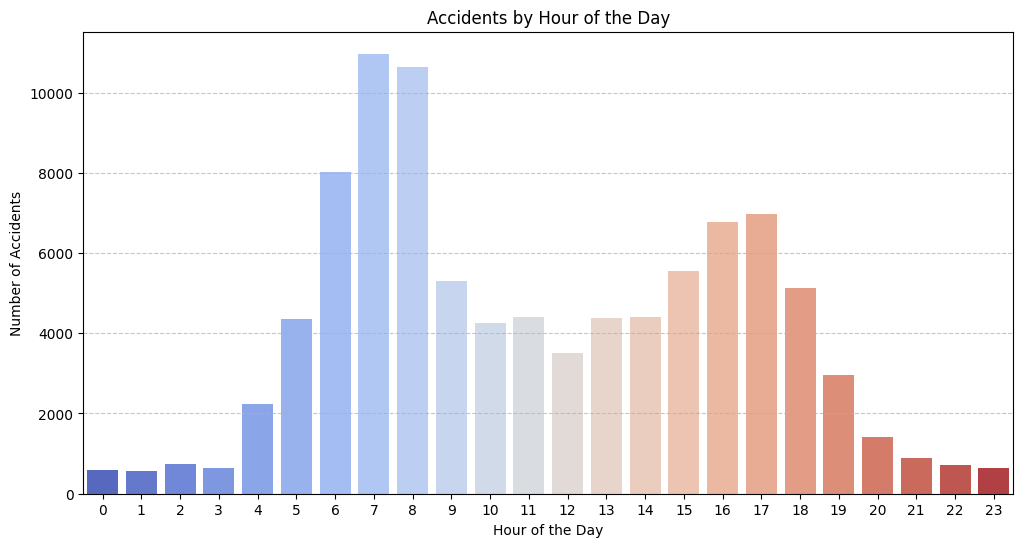

In [ ]:
df['Hour'] = df['Start_Time'].dt.hour

accidents_per_hour = df.groupby('Hour').size().reset_index(name='Accidents')

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Accidents', data=accidents_per_hour, palette='coolwarm')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of the Day')
plt.xticks(range(24))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


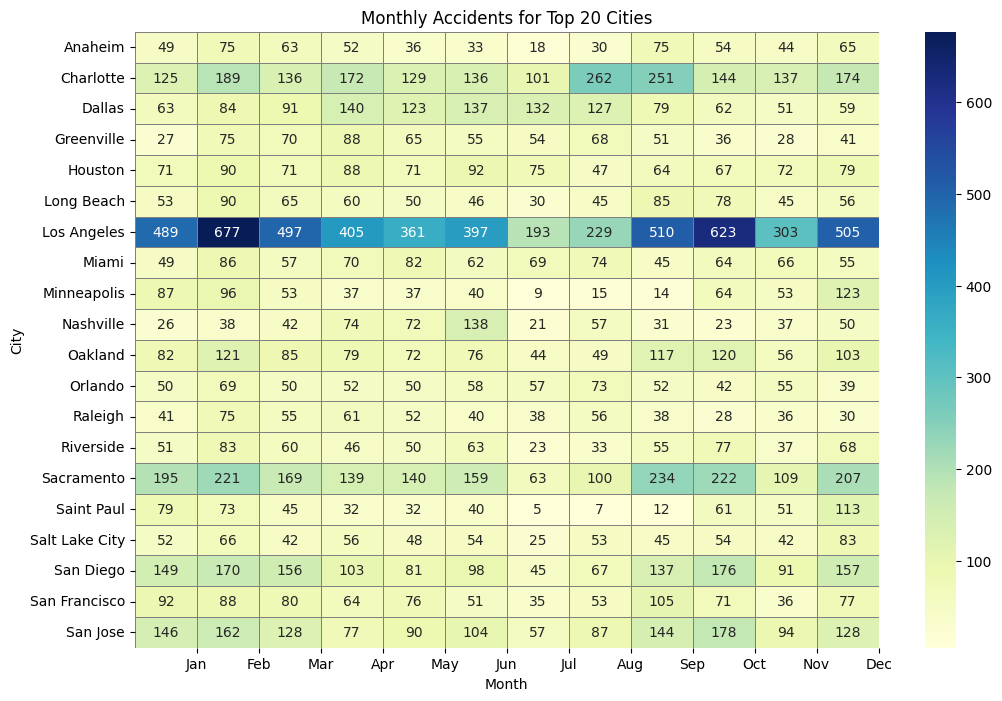

In [ ]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year

monthly_accidents = df.groupby(['City', 'Year', 'Month']).size().reset_index(name='Accidents')

total_accidents_per_city = monthly_accidents.groupby('City')['Accidents'].sum().reset_index()
top_20_cities = total_accidents_per_city.nlargest(20, 'Accidents')['City']

filtered_data = monthly_accidents[monthly_accidents['City'].isin(top_20_cities)]
pivot_table = filtered_data.pivot_table(index='City', columns='Month', values='Accidents', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, linecolor='gray')
plt.xlabel('Month')
plt.ylabel('City')
plt.title('Monthly Accidents for Top 20 Cities')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/690484789.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




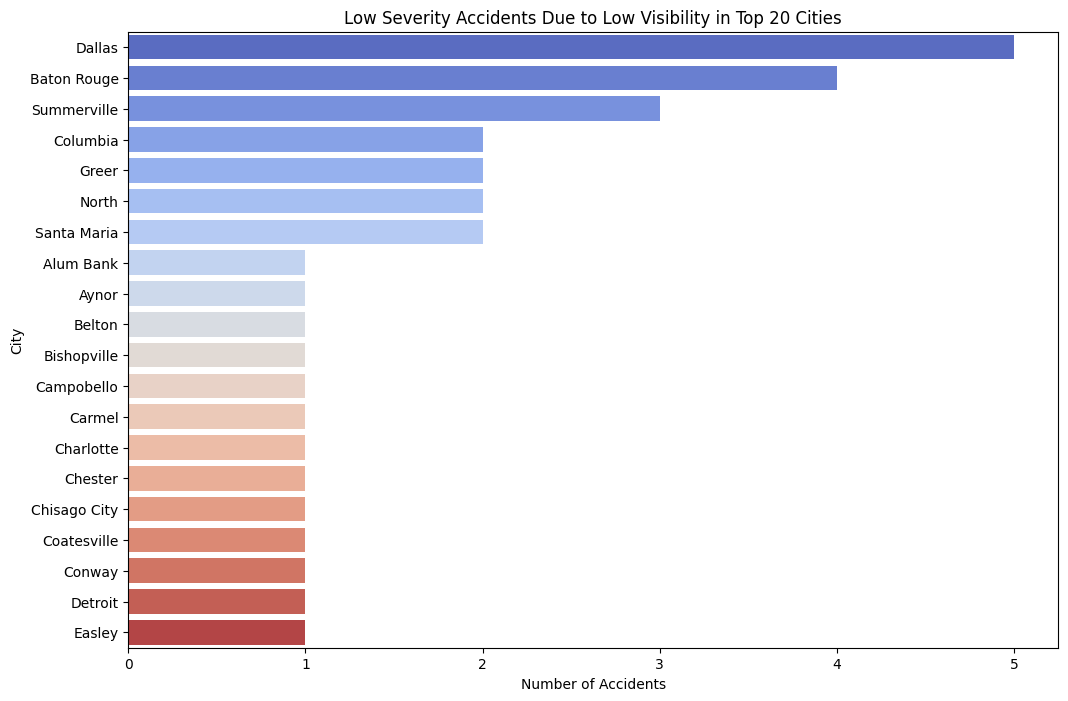

In [ ]:
low_severity_condition = df['Severity'] == 1 
low_visibility_condition = df['Visibility(mi)'] < 2  
filtered_df = df[low_severity_condition & low_visibility_condition]

accidents_per_city = filtered_df.groupby('City').size().reset_index(name='Accidents')

top_20_cities = accidents_per_city.nlargest(20, 'Accidents')

plt.figure(figsize=(12, 8))
sns.barplot(x='Accidents', y='City', data=top_20_cities, palette='coolwarm')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.title('Low Severity Accidents Due to Low Visibility in Top 20 Cities')
plt.show()


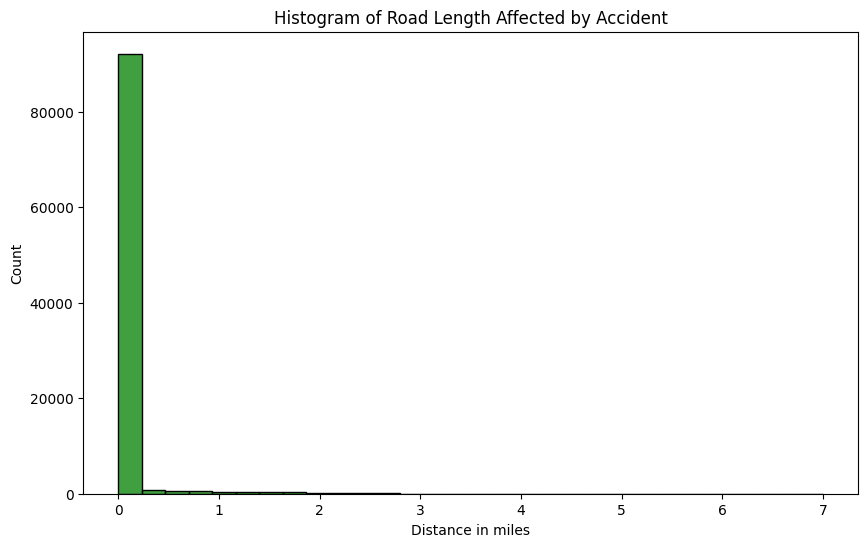

Average road length affected is 0.06 miles


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance(mi)'], bins=30, color='green', kde=False, binrange=(0, 7.0))

plt.xlabel("Distance in miles")
plt.ylabel("Count")
plt.title("Histogram of Road Length Affected by Accident")

plt.show()

print("Average road length affected is {0:.2f} miles".format(df["Distance(mi)"].mean()))


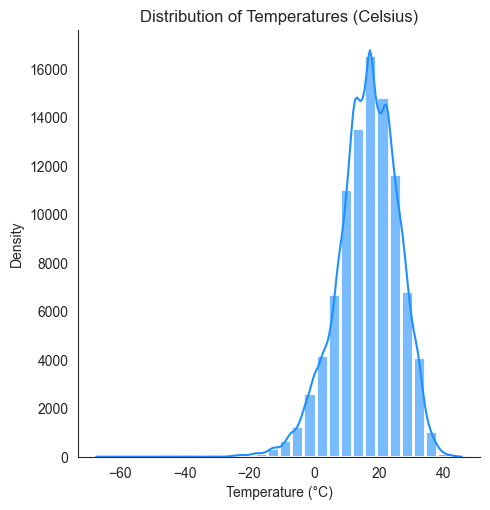

In [ ]:
df['Temperature(C)'] = (df['Temperature(F)'] - 32) * 5 / 9

sns.set_style("white")

sns.displot(df["Temperature(C)"].dropna(), 
            color="dodgerblue", 
            bins=30, 
            kde=True, 
            alpha= 0.6, 
            linewidth= 2)

plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.title("Distribution of Temperatures (Celsius)")

plt.show()



### Distribution indicate a lot of accidents happen in relatively cold weather when the temp is between 16 and 22 degree celcius.

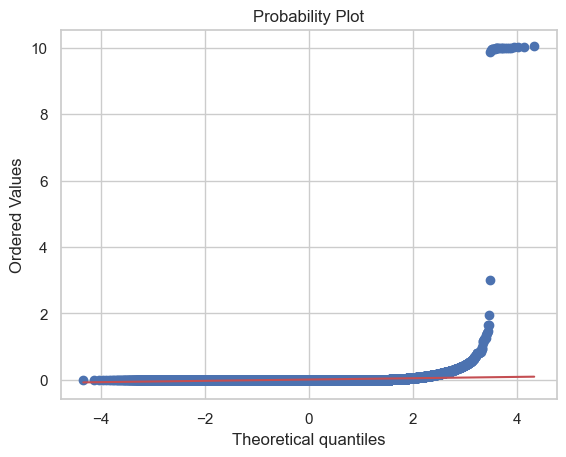

In [ ]:
stats.probplot(df["Precipitation(in)"].dropna(), dist="norm", plot=pylab)
pylab.show()

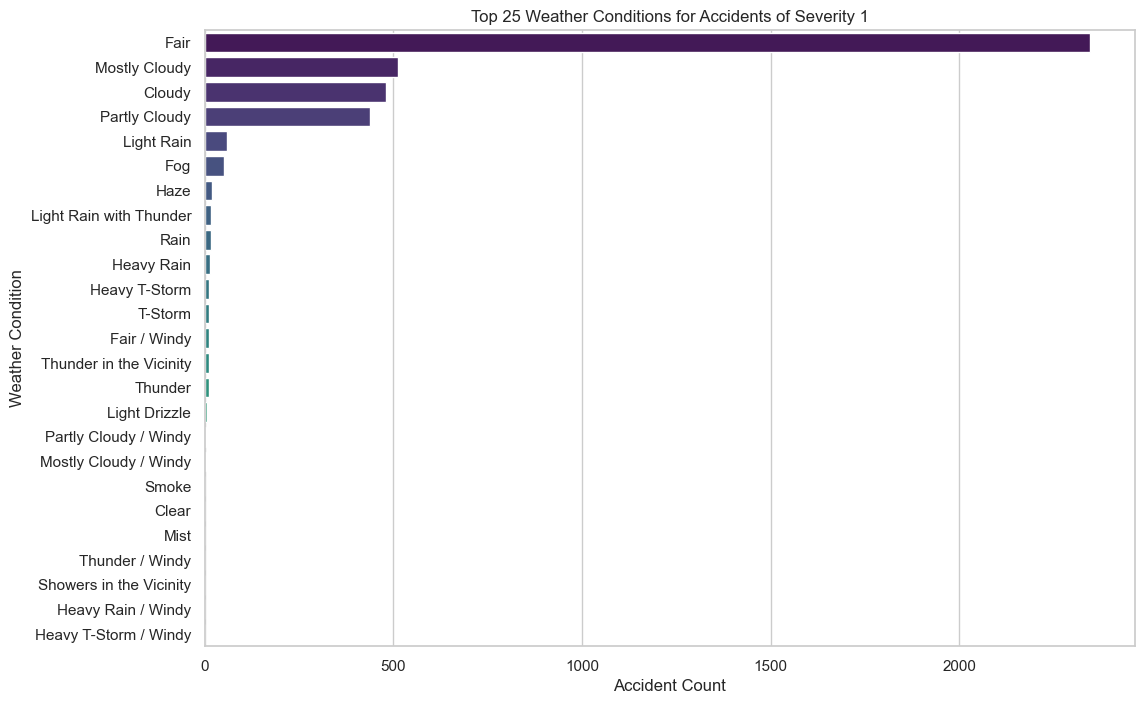

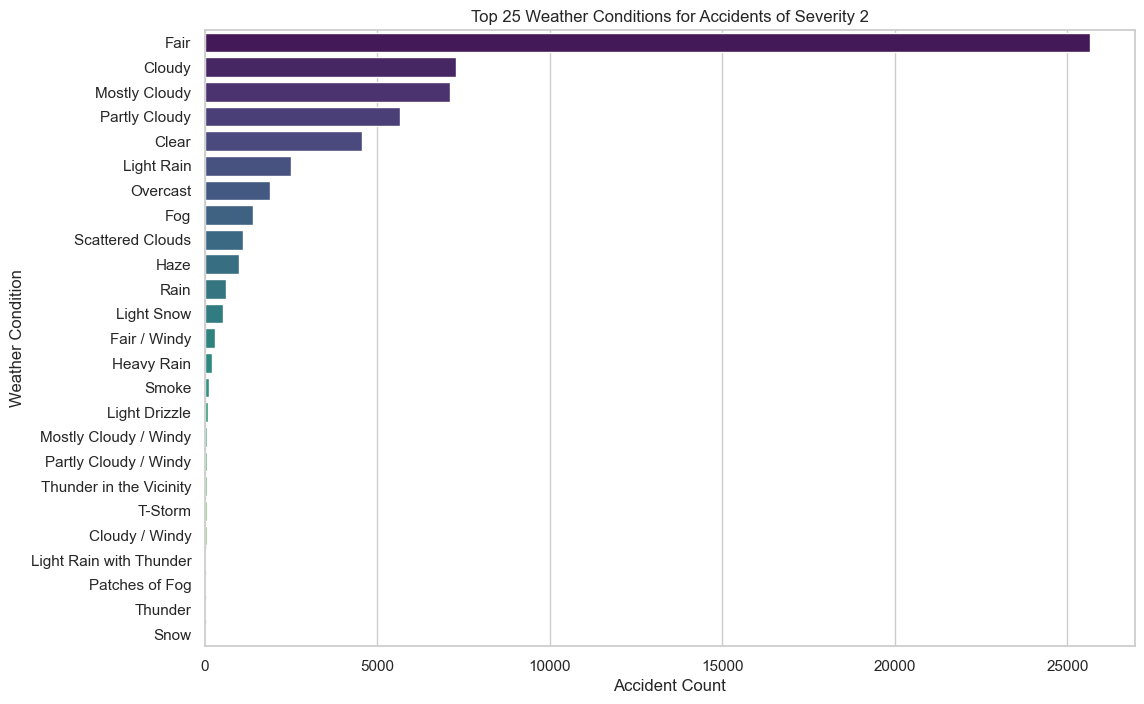

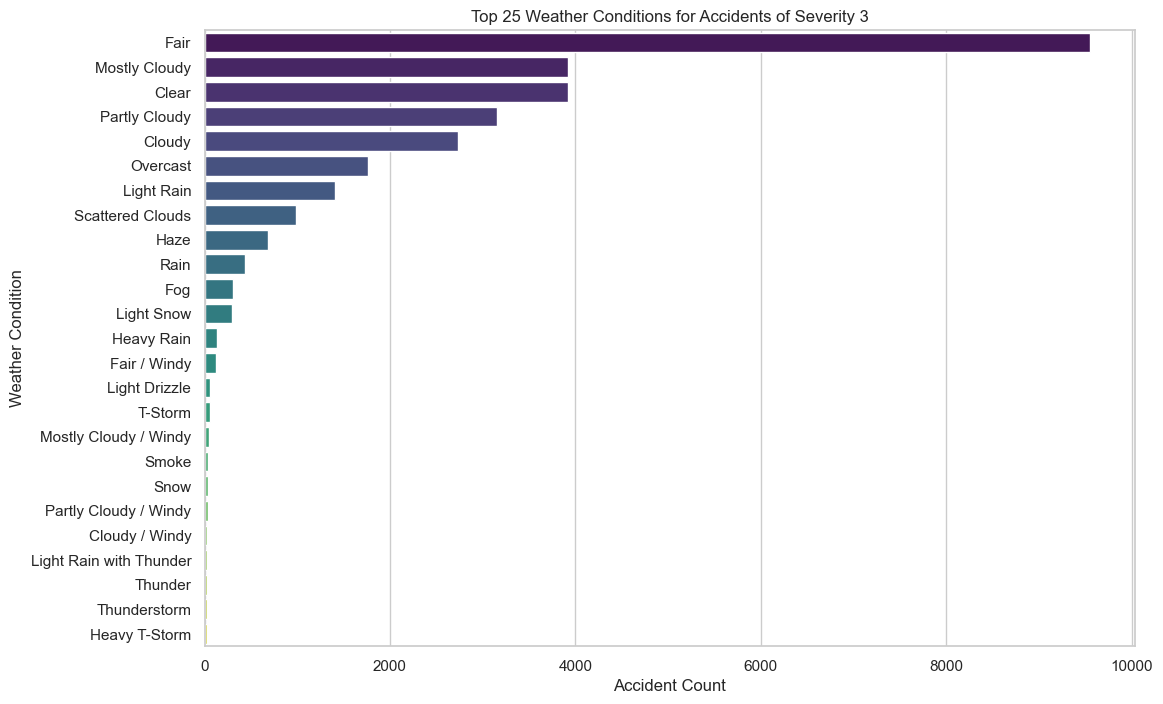

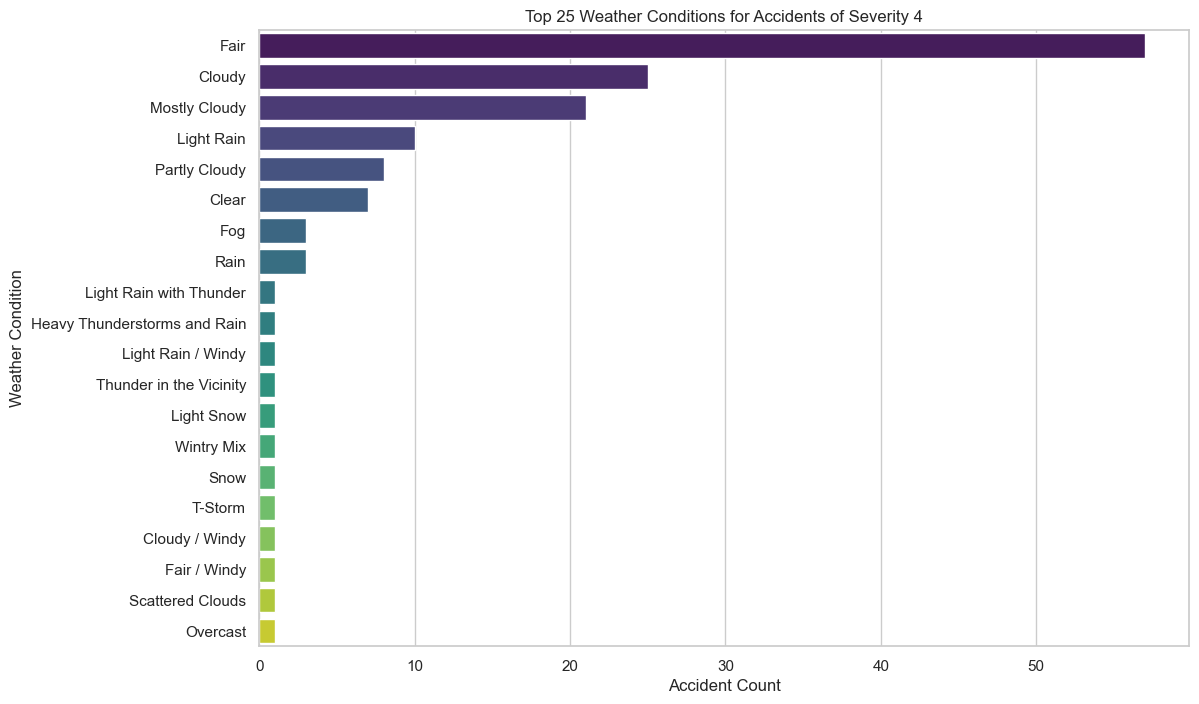

In [ ]:
for x in range(1,5):
    
    severity_one_df = df[df['Severity'] == x]

    weather_counts = severity_one_df['Weather_Condition'].value_counts().head(25)

    weather_counts_df = weather_counts.reset_index()
    weather_counts_df.columns = ['Weather_Condition', 'Accident_Count']

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Accident_Count', y='Weather_Condition', data=weather_counts_df, hue='Weather_Condition', dodge=False, palette='viridis')

    plt.xlabel('Accident Count')
    plt.ylabel('Weather Condition')
    plt.title(f'Top 25 Weather Conditions for Accidents of Severity {x}')
    plt.legend([],[], frameon=False)
    plt.show()



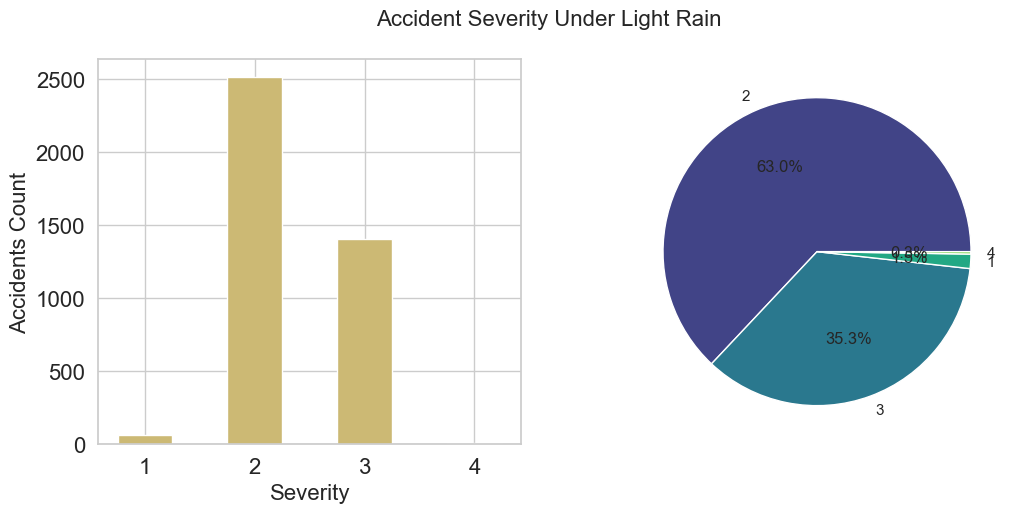

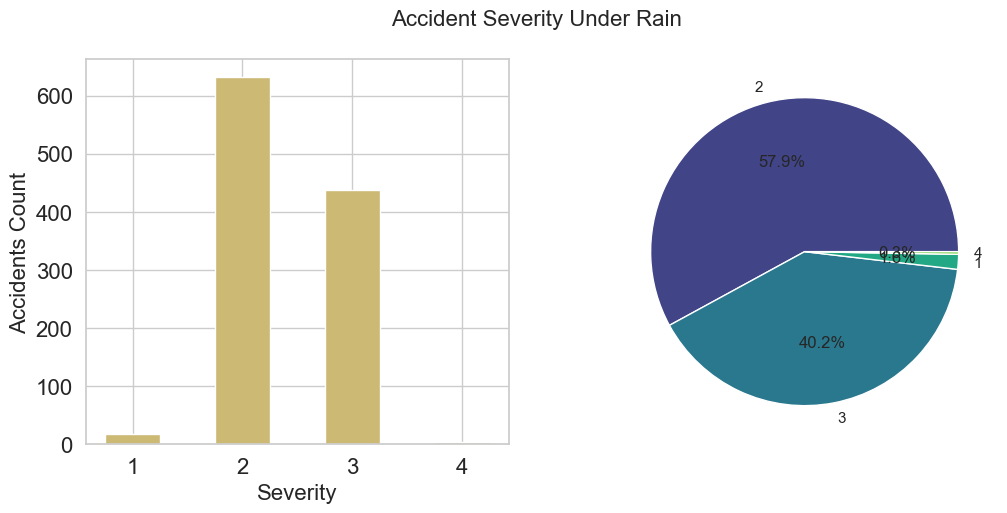

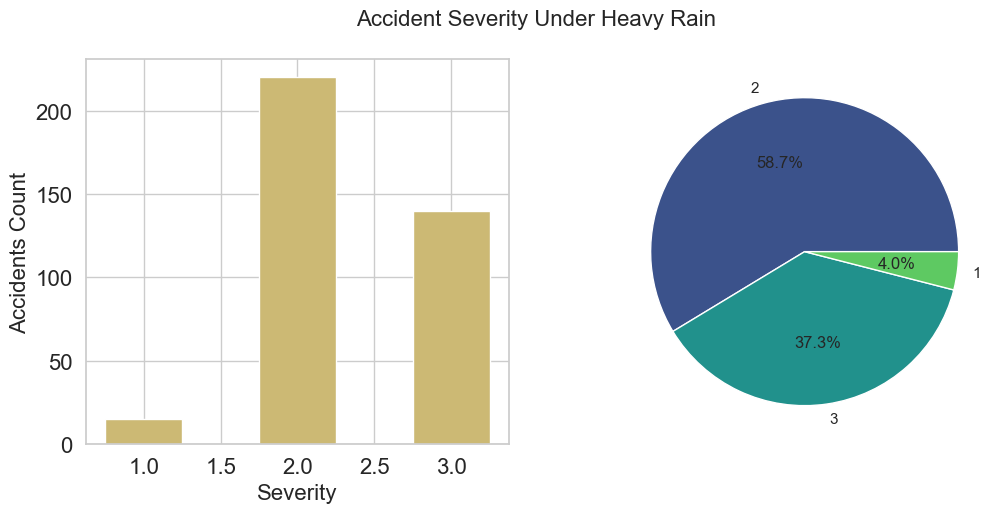

In [ ]:
for condition in ["Light Rain", "Rain", "Heavy Rain"]:
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle("Accident Severity Under " + condition, fontsize=16)

    # Bar plot
    severity_counts = df.loc[df["Weather_Condition"] == condition]["Severity"].value_counts()
    axes[0].bar(severity_counts.index, severity_counts.values, color='y', width=0.5)
    axes[0].set_xlabel("Severity", fontsize=16)
    axes[0].set_ylabel("Accidents Count", fontsize=16)
    axes[0].tick_params(axis='x', labelsize=16)
    axes[0].tick_params(axis='y', labelsize=16)
    
    # Pie chart
    axes[1].pie(severity_counts, labels=severity_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(severity_counts)))
    
    plt.show()

    

#### As it is shown from the graph that most of the accident caused in the presence of rain falls in the severity range of 2 and 3 causing intermediate effect on the traffic. Accidents due to rain can be accounted due to the slippery nature of the roads

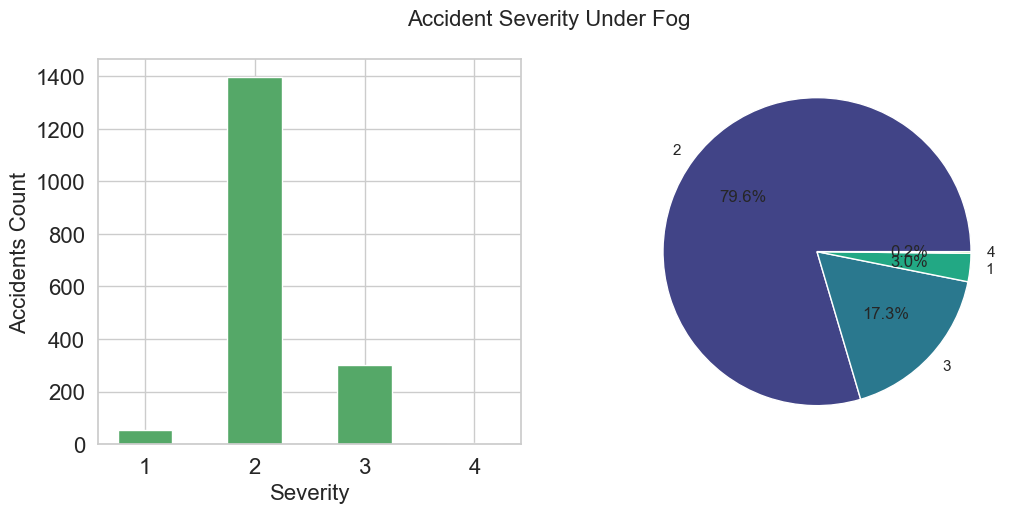

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accident Severity Under Fog", fontsize=16)

# Bar plot
severity_counts = df.loc[df["Weather_Condition"] == "Fog"]["Severity"].value_counts()
axes[0].bar(severity_counts.index, severity_counts.values, color='g', width=0.5)
axes[0].set_xlabel("Severity", fontsize=16)
axes[0].set_ylabel("Accidents Count", fontsize=16)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)

# Pie chart
axes[1].pie(severity_counts, labels=severity_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(severity_counts)))

plt.show()

#### Almost 80% of the accidents accured in the presence of Fog are under the severity 2

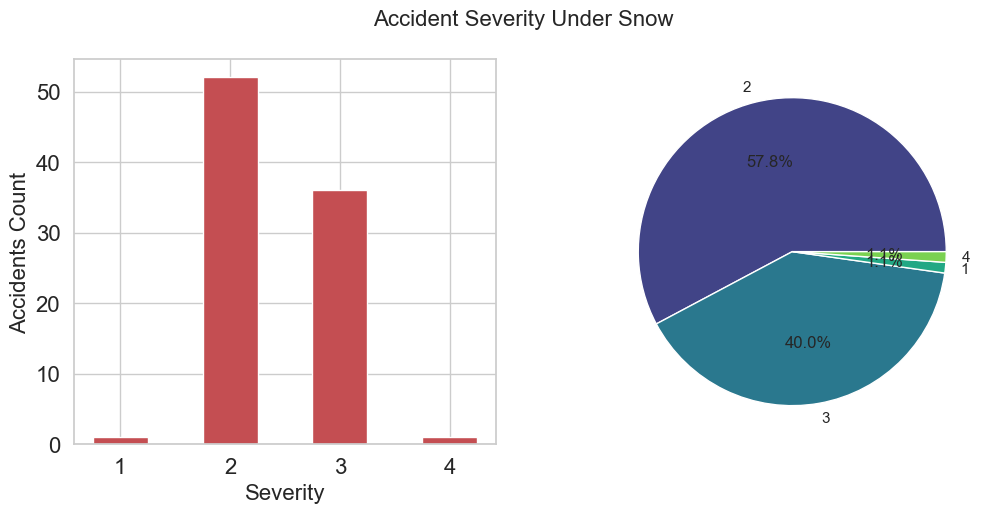

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accident Severity Under Snow", fontsize=16)

# Bar plot
severity_counts = df.loc[df["Weather_Condition"] == "Snow"]["Severity"].value_counts()
axes[0].bar(severity_counts.index, severity_counts.values, color='r', width=0.5)
axes[0].set_xlabel("Severity", fontsize=16)
axes[0].set_ylabel("Accidents Count", fontsize=16)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)

# Pie chart
axes[1].pie(severity_counts, labels=severity_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(severity_counts)))

plt.show()

#### Almost 80% of the accidents accured in the presence of Fog are under the severity 2 But notable factor here is that, even though the accident counts do not increase exponentially under the presence of of rain, fog and snow these defenitely increase the severity of the accident that occur in the their presence

In [ ]:

lat_lng_pairs = zip( list(df.Start_Lat[:50]) , list(df.Start_Lng[:50]) ) 
map_ = folium.Map()  
HeatMap(lat_lng_pairs).add_to(map_) 
map_


#### we can see that which areas are the highest accident prone areas from map by Longitudes and Latitudes

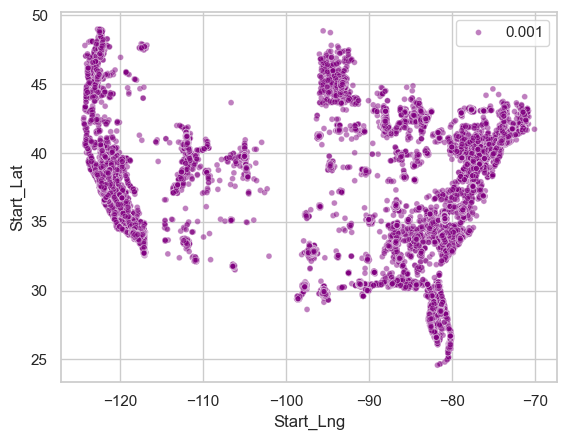

In [ ]:
sns.scatterplot( x = df.Start_Lng , y = df.Start_Lat, size = 0.001  ,alpha = 0.5 ,color= 'purple') 
plt.show()

/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/2173270040.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



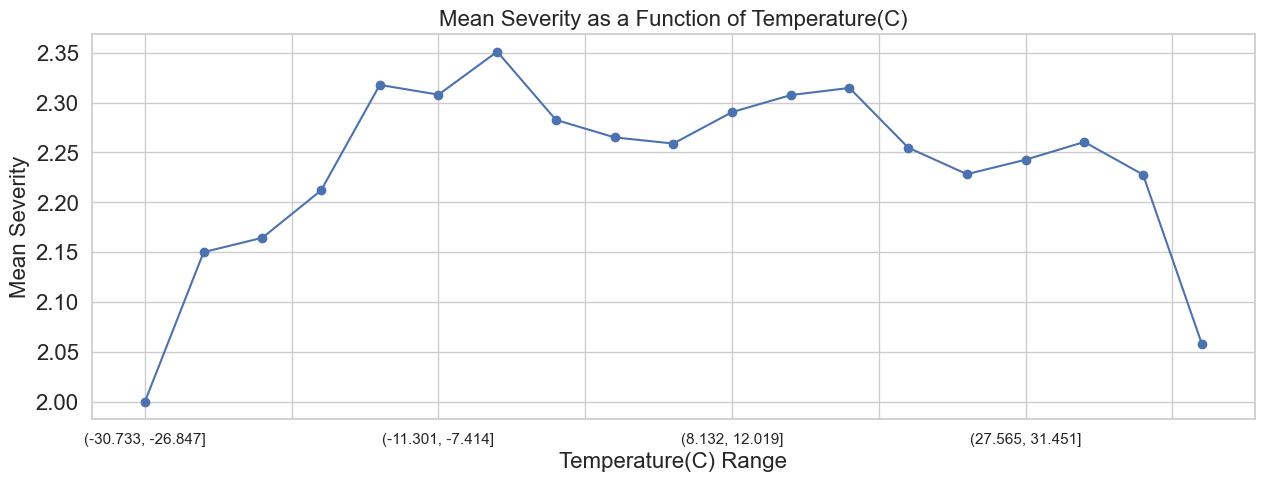

/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/2173270040.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



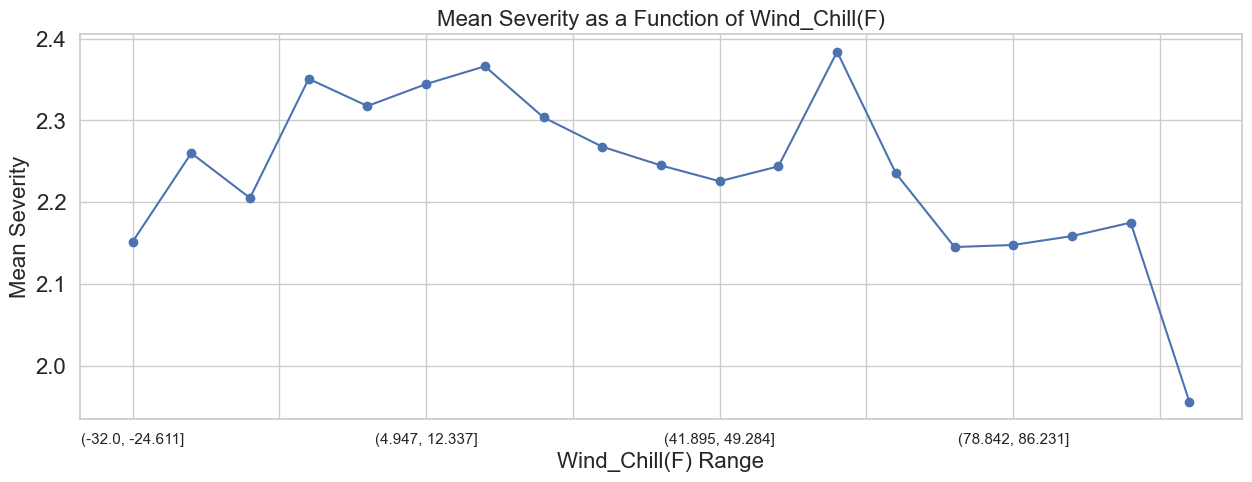

/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/2173270040.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



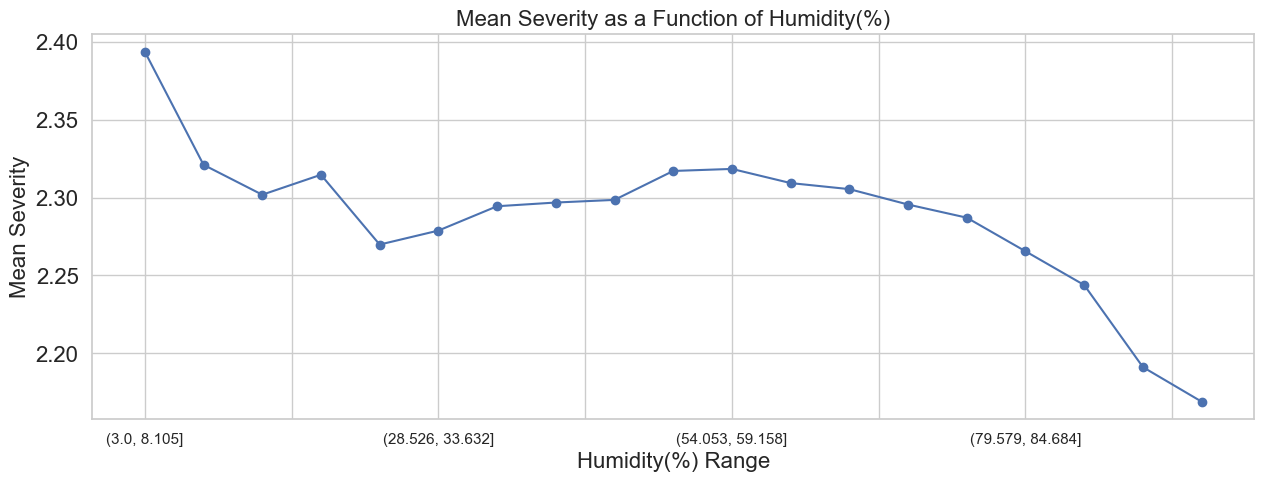

/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/2173270040.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



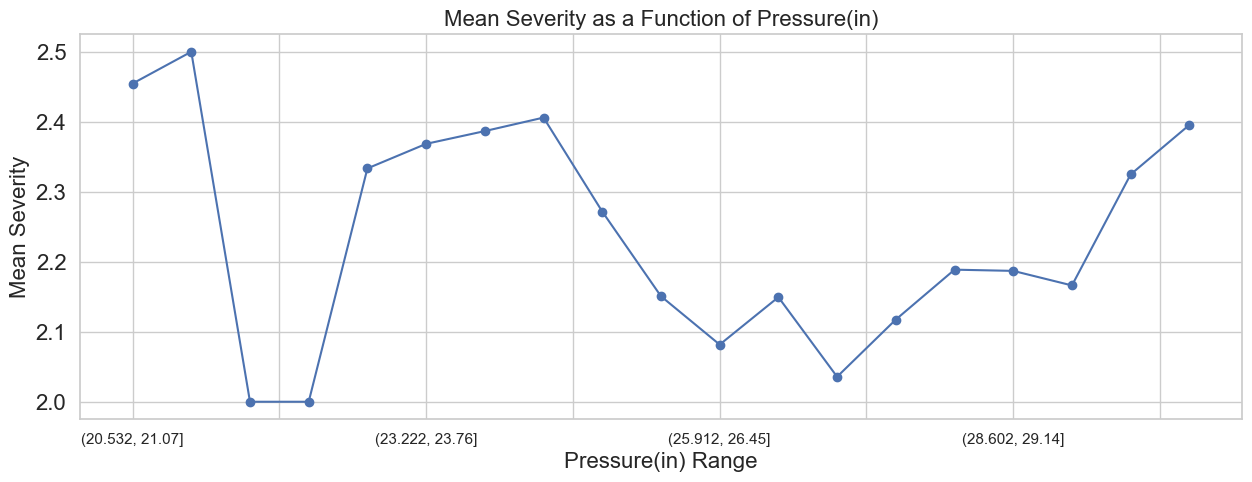

/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/2173270040.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



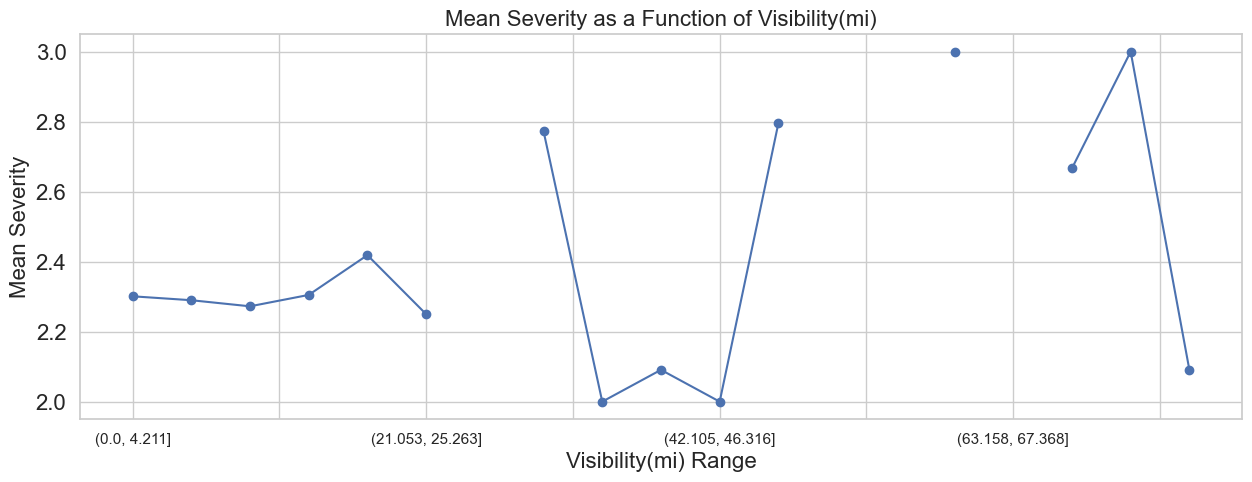

/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/2173270040.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



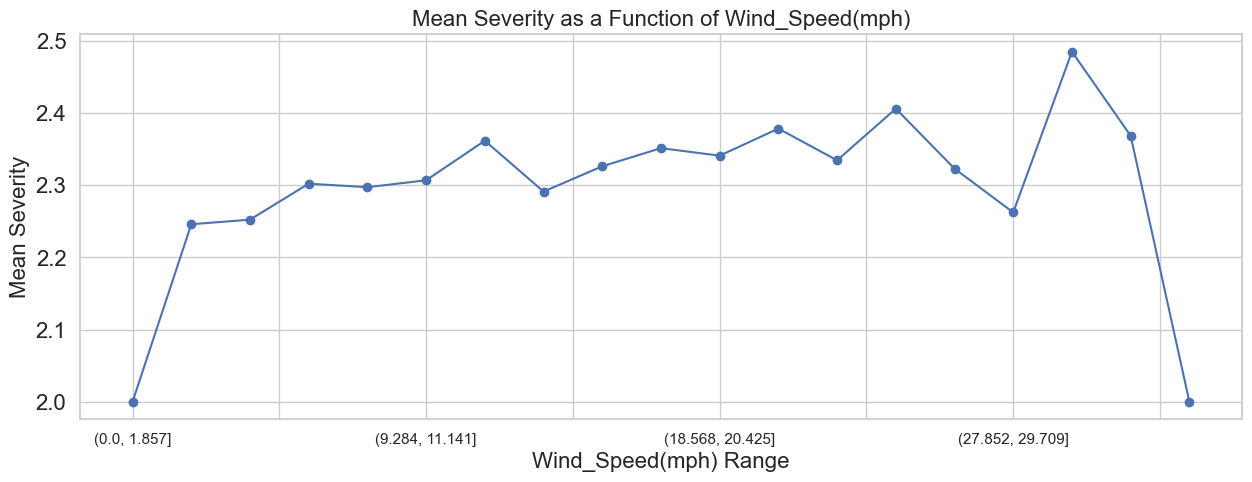

In [ ]:
environment_conditions = ["Temperature(C)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)"]

for condition in environment_conditions:
    factorMin = df[condition].quantile(q=0.0001)
    factorMax = df[condition].quantile(q=0.9999)
    
    bins = np.linspace(factorMin, factorMax, num=20)
    mean_severity = df.groupby(pd.cut(df[condition], bins))["Severity"].mean()
    
    plt.figure(figsize=(15,5))
    mean_severity.plot(kind='line', marker='o')  
    plt.title("Mean Severity as a Function of " + condition, fontsize=16)
    plt.xlabel(condition + " Range", fontsize=16)
    plt.ylabel("Mean Severity", fontsize=16)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=16)
    plt.grid(True)  
    plt.show()


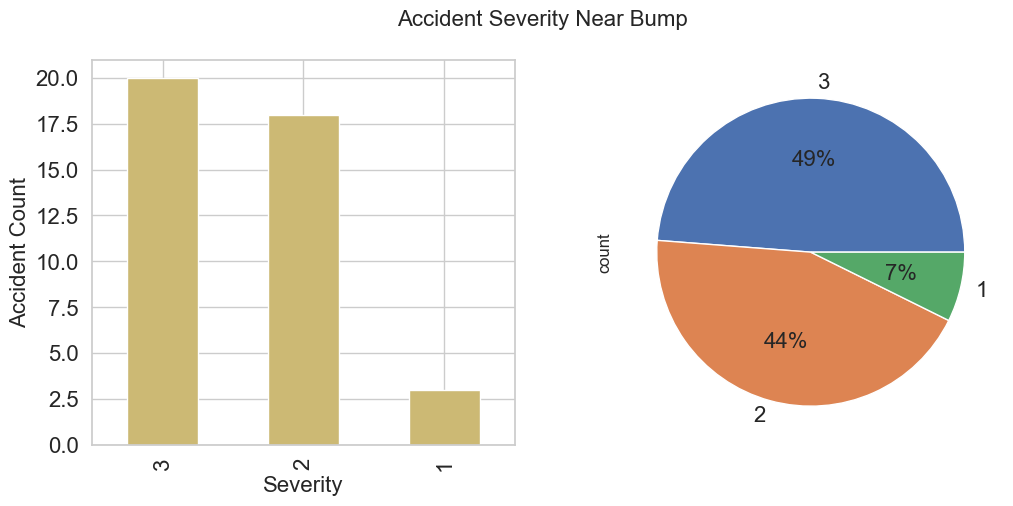

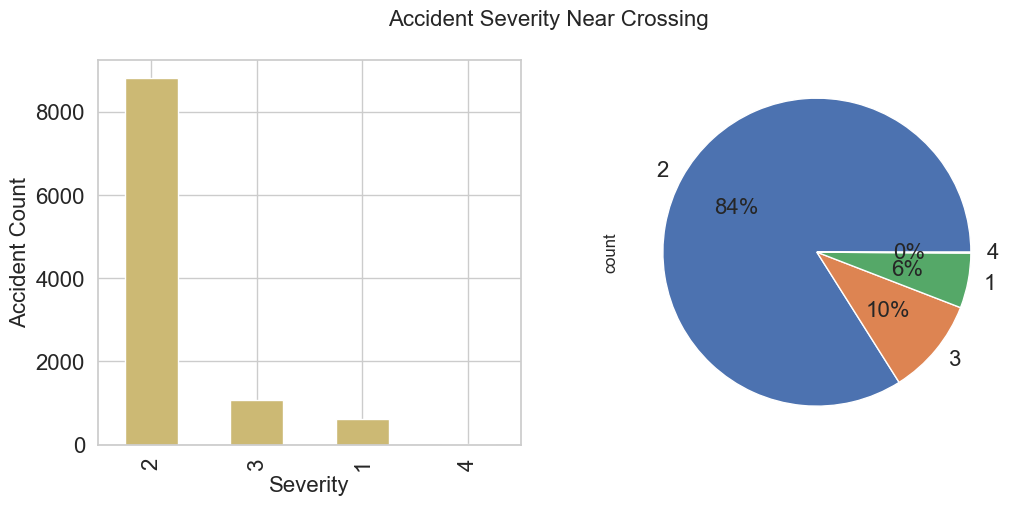

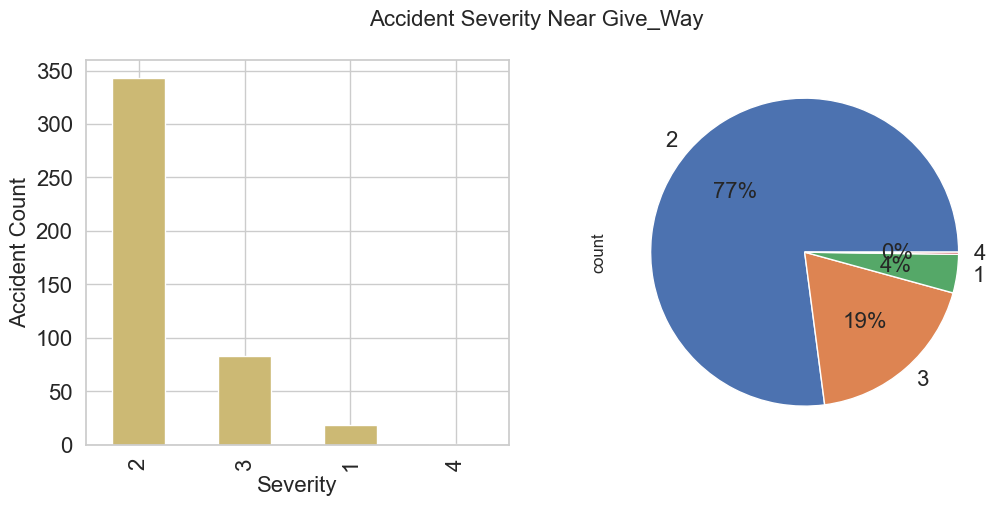

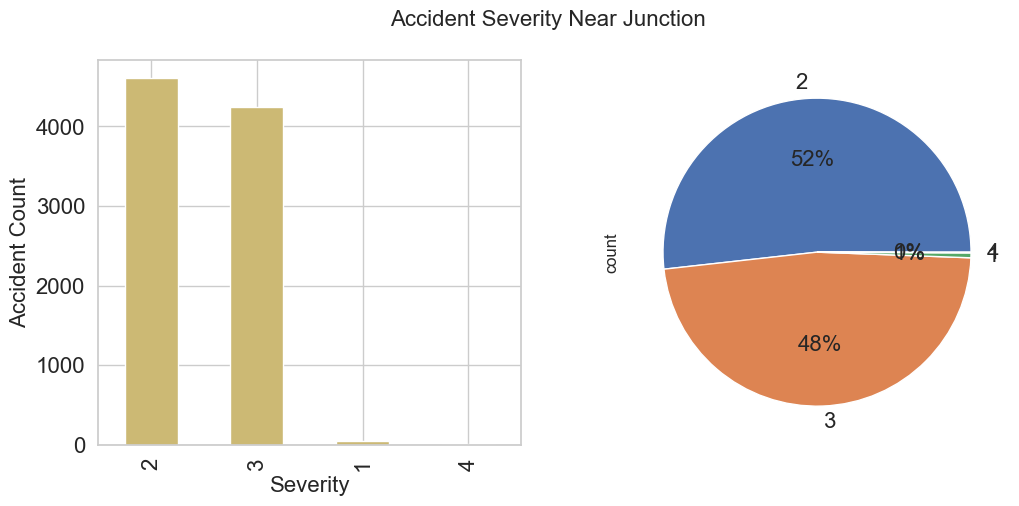

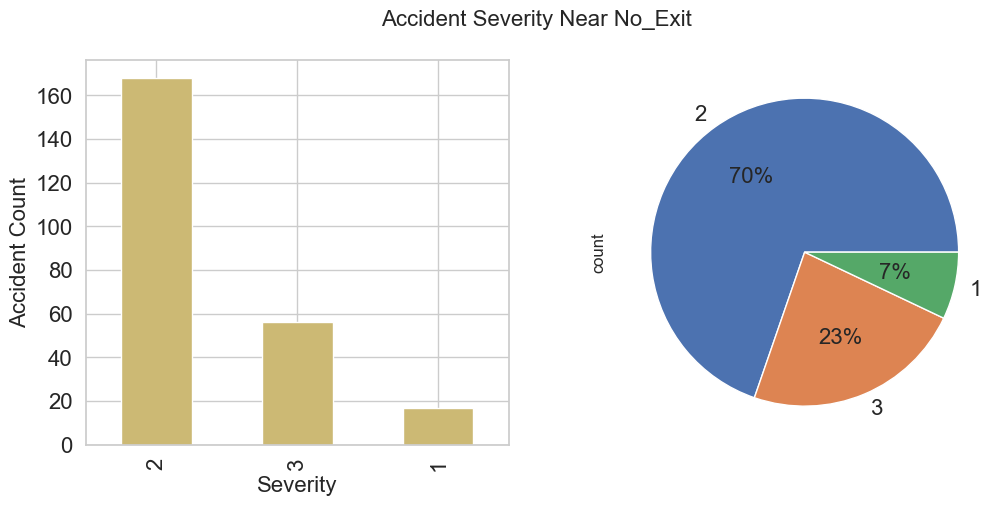

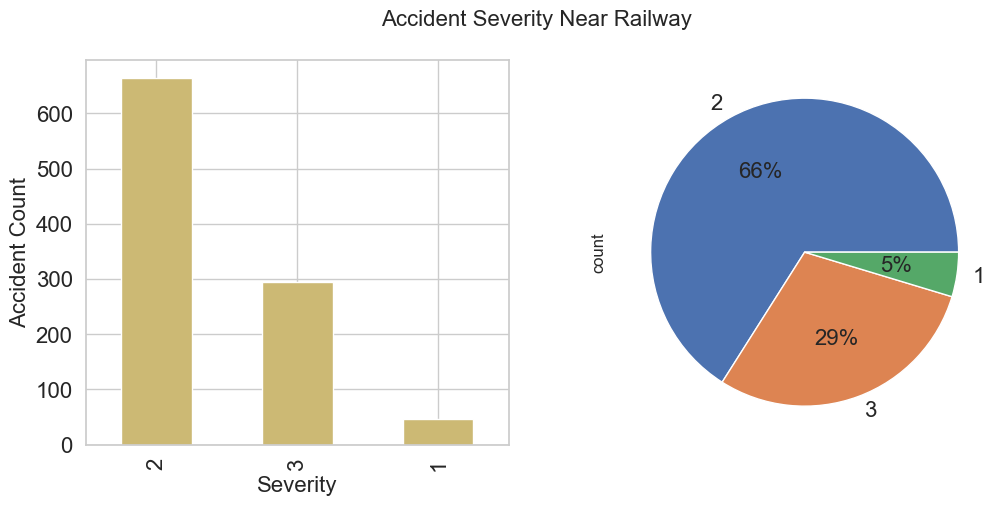

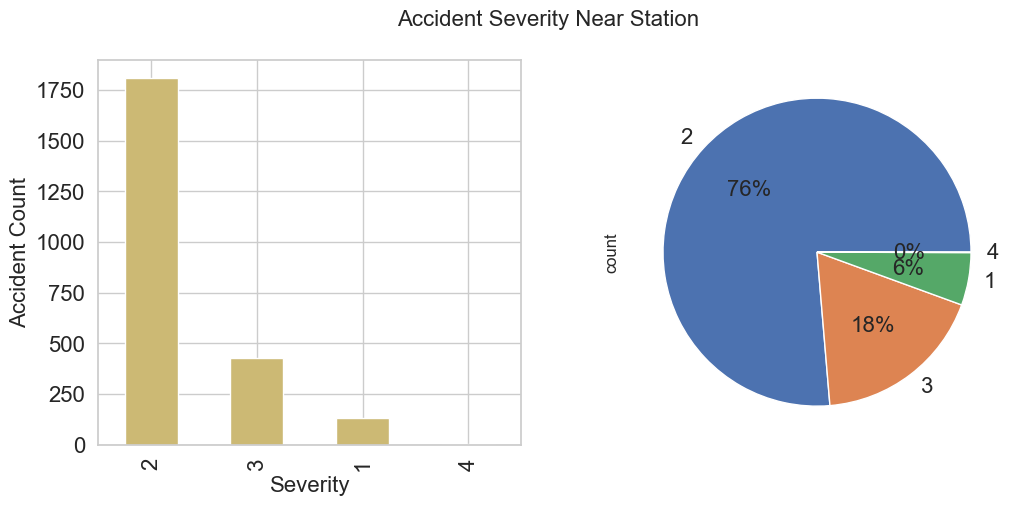

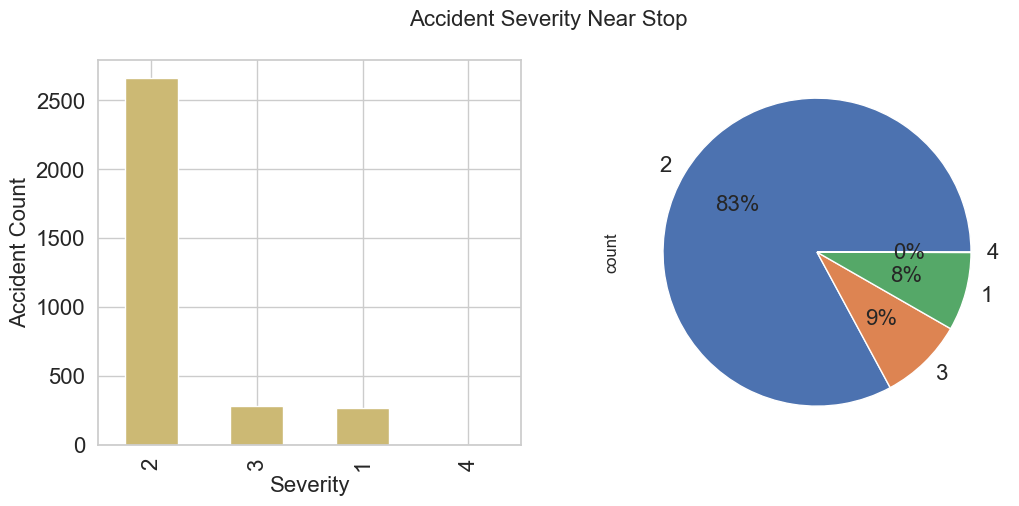

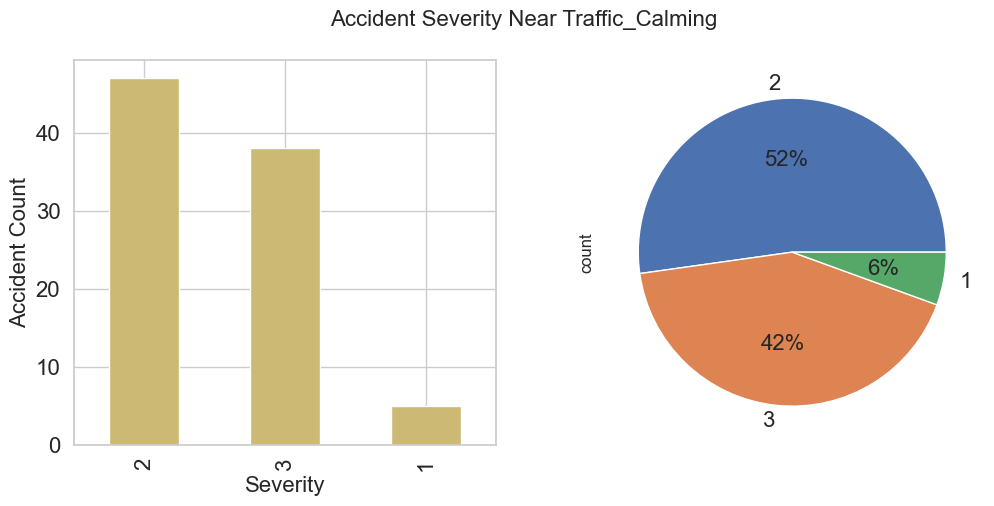

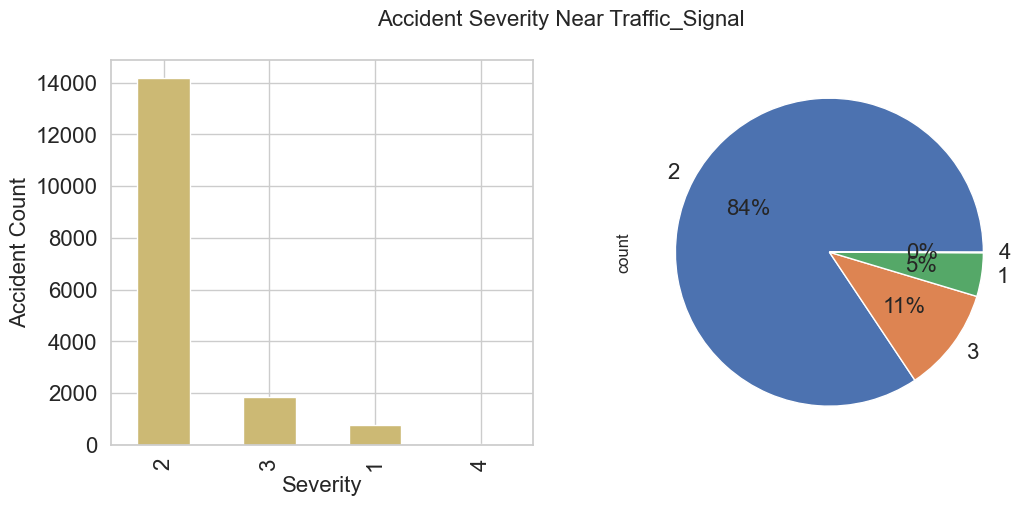

In [ ]:
for factor in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop']:
    if(df[factor]==True).sum()>0:
        plt.subplots(1,2, figsize=(12,5))
        plt.xticks(fontsize = 14)
        plt.suptitle("Accident Severity Near " + factor, fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[factor]==True]['Severity'].value_counts().plot.bar(width = 0.5, color="y")
        plt.xlabel("Severity", fontsize=16)
        plt.ylabel("Accident Count", fontsize= 16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[factor]==True]["Severity"].value_counts().plot.pie(autopct="%1.0f%%", fontsize=16)
        
        

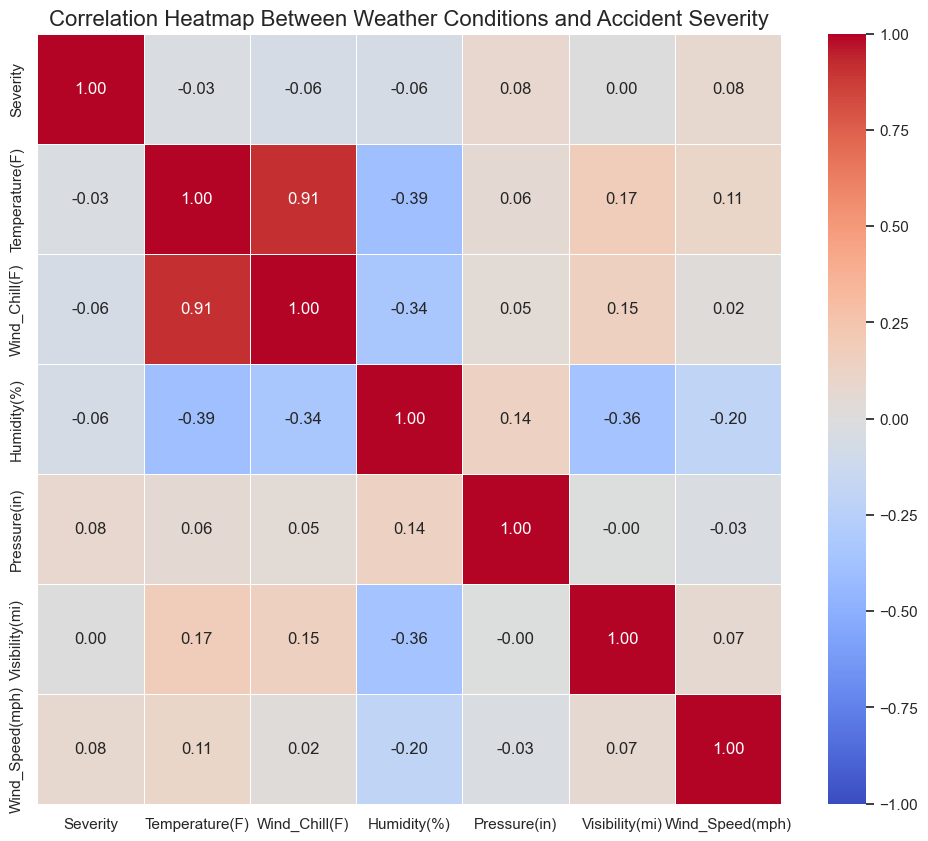

In [ ]:
weather_conditions = ["Temperature(F)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)"]
df_filtered = df[['Severity'] + weather_conditions].dropna()
df_filtered[weather_conditions] = df_filtered[weather_conditions].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Weather Conditions and Accident Severity', fontsize=16)
plt.show()


/var/folders/63/lq5s0hf94s7ftvssnm5v1d9r0000gn/T/ipykernel_29535/1848260021.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




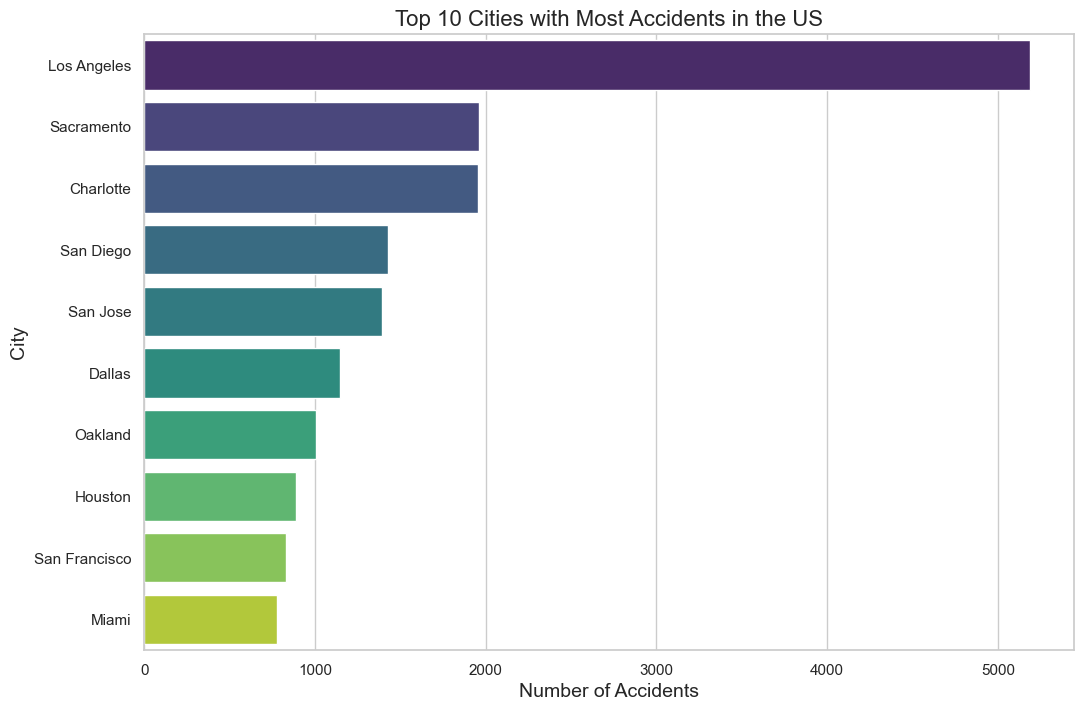

In [ ]:
city_accidents = df['City'].value_counts()

top_10_cities = city_accidents.head(10)

top_10_df = top_10_cities.reset_index()
top_10_df.columns = ['City', 'Accident_Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='Accident_Count', y='City', data=top_10_df, palette='viridis', hue=None)
plt.title('Top 10 Cities with Most Accidents in the US', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()



## Hypothesis Idea #1: Average Severity of Car Accidents
#### Null Hypothesis (H0): The average severity of car accidents in the US is less than or equal to 2.5.

#### Alternative Hypothesis (H1): The average severity of car accidents in the US is greater than 2.5..


In [ ]:
severity = df['Severity'].dropna()

mean_severity = severity.mean()
t_stat, p_val = stats.ttest_1samp(severity, 2.5)

print(f'Average Severity: {mean_severity}')
print(f'T-statistic: {t_stat}, P-value: {p_val}')


Average Severity: 2.2764468147160537
T-statistic: -129.1407057052675, P-value: 0.0


#### Reject H0: If the p-value is less than 0.05, we reject the null hypothesis, indicating that the average severity is significantly greater than 2.5.
#### Fail to Reject H0: If the p-value is greater than 0.05, we do not have sufficient evidence to claim that the average severity is greater than 2.5.


## Hypothesis Idea #2: Average Distance Affected by Accidents
#### Null Hypothesis (H0): The average distance that an accident affects the road is equal to one mile.

#### Alternative Hypothesis (H1): The average distance that an accident affects the road is less than one mile.

In [ ]:
distance = df['Distance(mi)'].dropna()

mean_distance = distance.mean()
t_stat, p_val = stats.ttest_1samp(distance, 1)

print(f'Average Distance: {mean_distance}')
print(f'T-statistic: {t_stat}, P-value: {p_val}')


Average Distance: 0.05915659754470886
T-statistic: -607.3177877224606, P-value: 0.0


### Explanation:

#### Mean Distance: Calculate the average distance affected by accidents.
#### T-Test: Compare the sample mean against the hypothesized value (1 mile).
## Interpretation:

#### Reject H0: If the p-value is less than 0.05, we reject the null hypothesis, indicating that the average distance is significantly less than one mile.
#### Fail to Reject H0: If the p-value is greater than 0.05, we do not have sufficient evidence to claim that the average distance is less than one mile.


## Hypothesis Idea #3: Impact of Weather Conditions on Severity
#### Null Hypothesis (H0): Weather conditions do not affect the severity of accidents; the severity is independent of weather conditions.

#### Alternative Hypothesis (H1): Weather conditions affect the severity of accidents; the severity depends on weather conditions.



In [ ]:
conditions_of_interest = ['Clear', 'Fair', 'Freezing Rain', 'Light Rain', 'Rain', 'Snow']
df_weather = df[df['Weather_Condition'].isin(conditions_of_interest)]
df_weather = df_weather.dropna(subset=['Severity'])

anova_results = stats.f_oneway(
    df_weather[df_weather['Weather_Condition'] == 'Clear']['Severity'],
    df_weather[df_weather['Weather_Condition'] == 'Fair']['Severity'],
    df_weather[df_weather['Weather_Condition'] == 'Freezing Rain']['Severity'],
    df_weather[df_weather['Weather_Condition'] == 'Light Rain']['Severity'],
    df_weather[df_weather['Weather_Condition'] == 'Rain']['Severity'],
    df_weather[df_weather['Weather_Condition'] == 'Snow']['Severity']
)

print(f'ANOVA F-statistic: {anova_results.statistic}, P-value: {anova_results.pvalue}')


ANOVA F-statistic: 402.6286444183808, P-value: 0.0


### Explanation:

#### ANOVA Test: Compare the mean severity across multiple weather conditions.
### Interpretation:

#### Reject H0: If the p-value is less than 0.05, we reject the null hypothesis, indicating that different weather conditions have a significant impact on the severity of accidents.
#### Fail to Reject H0: If the p-value is greater than 0.05, we do not have sufficient evidence to claim that weather conditions affect the severity of accidents.

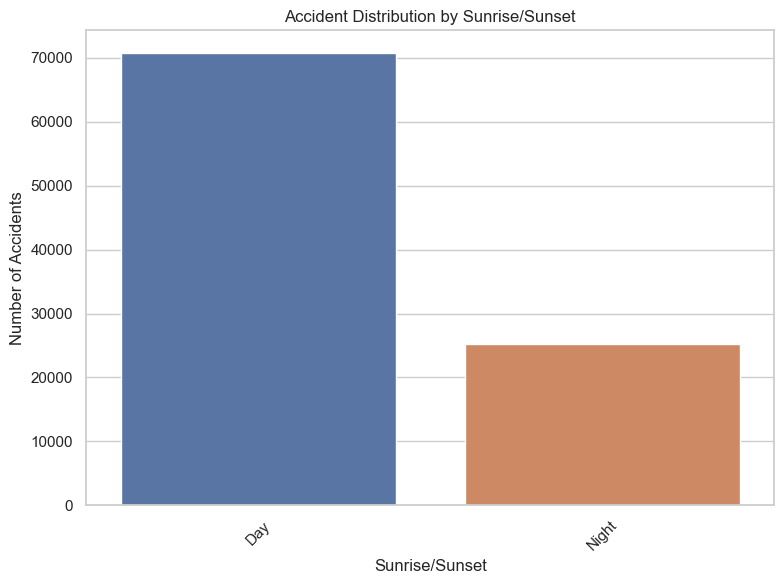

In [ ]:
df = df.dropna(subset=['Sunrise_Sunset'])

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='Sunrise_Sunset', data=df, ax=ax, hue='Sunrise_Sunset')
ax.set_title('Accident Distribution by Sunrise/Sunset')
ax.set_xlabel('Sunrise/Sunset')
ax.set_ylabel('Number of Accidents')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


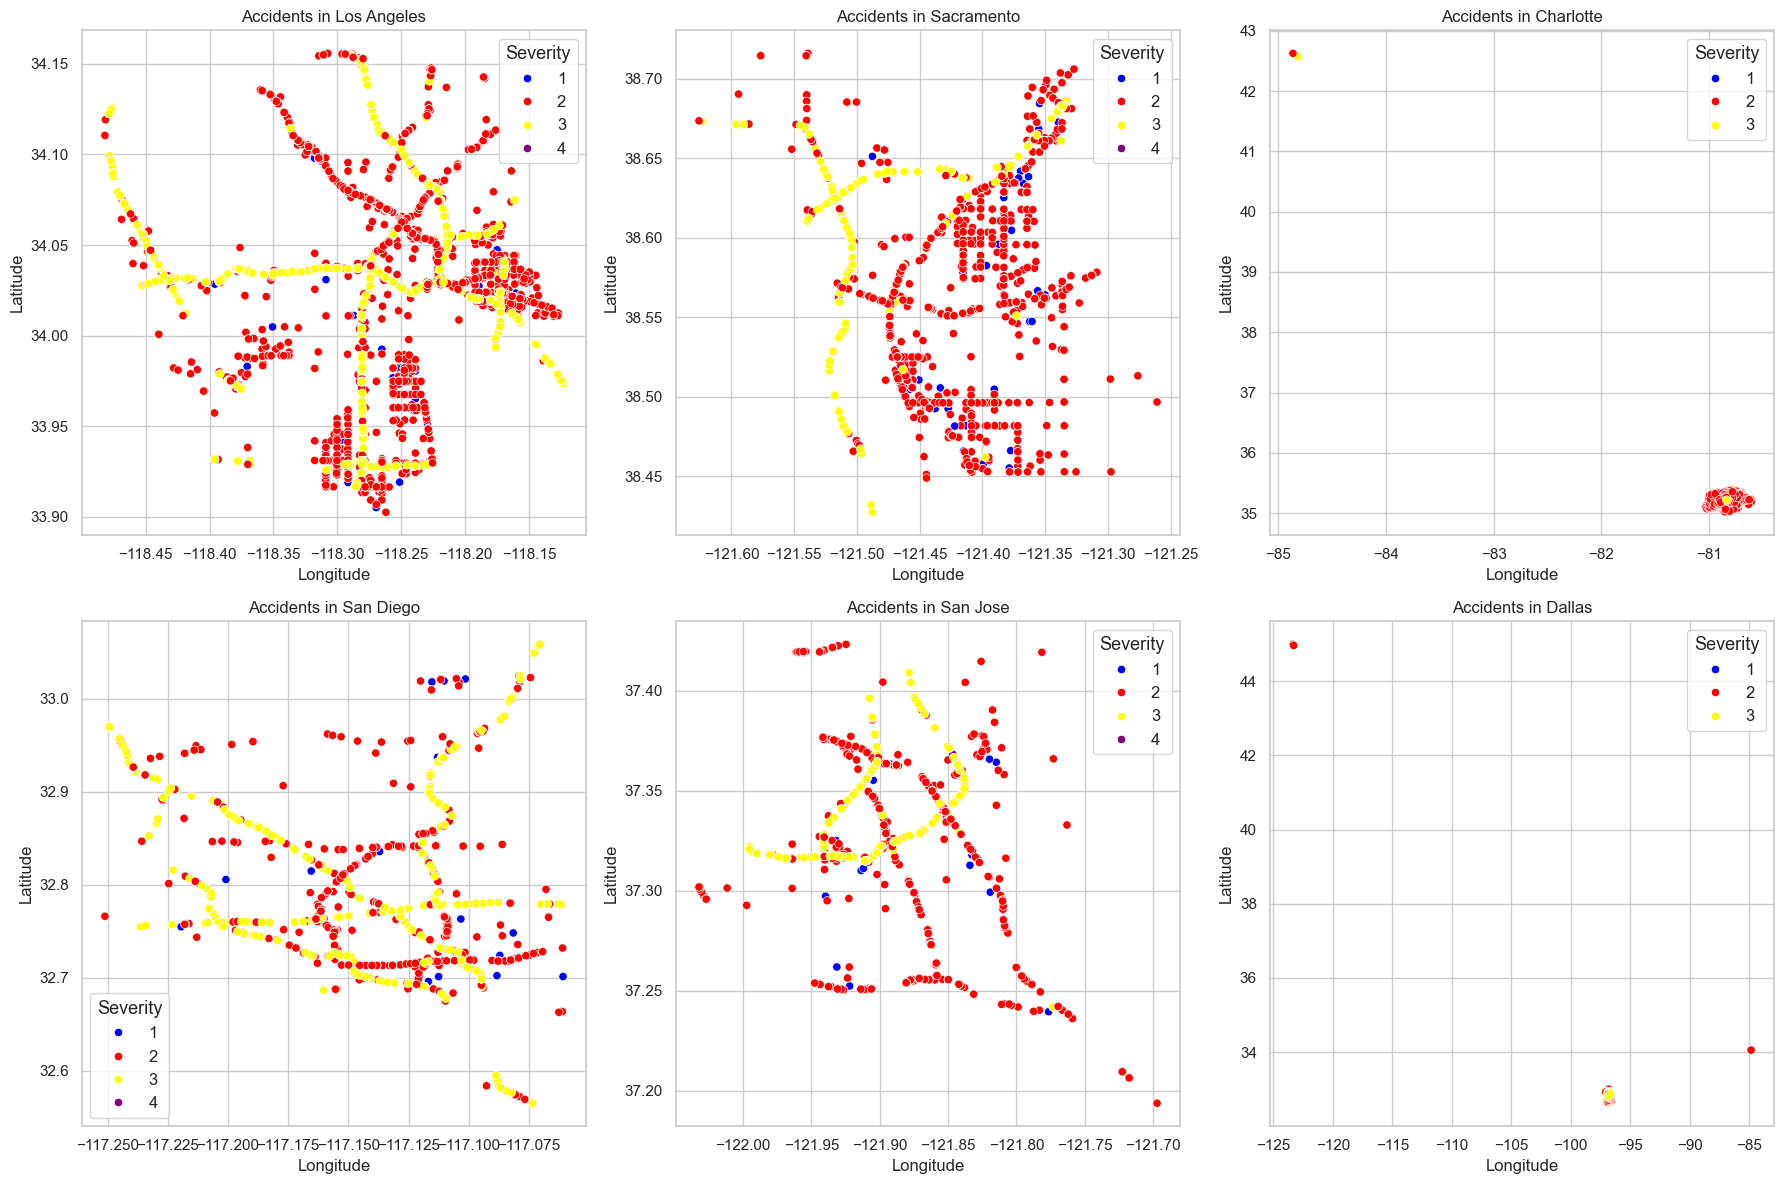

In [ ]:
top_cities = df['City'].value_counts().nlargest(6).index
df_top_cities = df[df['City'].isin(top_cities)]

colors = {1: 'blue', 2: 'red', 3: 'yellow', 4: 'purple'}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  
for i, city in enumerate(top_cities):
    city_data = df_top_cities[df_top_cities['City'] == city]
    sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=city_data, palette=colors, ax=axes[i])
    axes[i].set_title(f'Accidents in {city}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    axes[i].legend(title='Severity', title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.show()


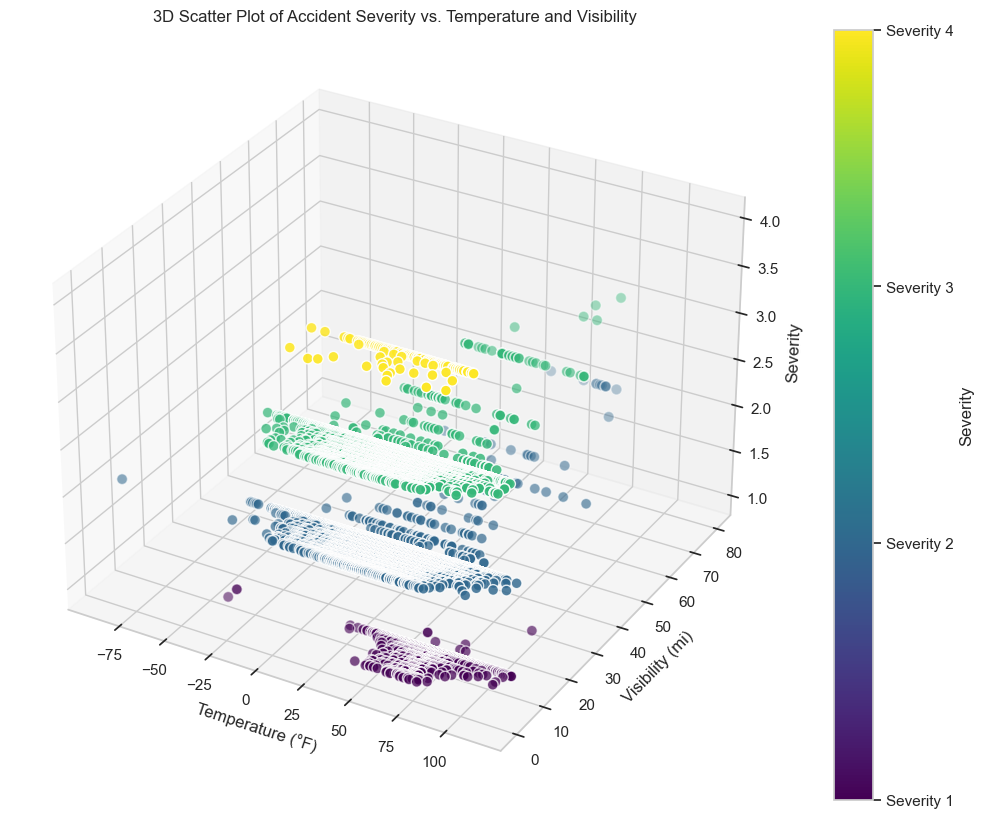

In [ ]:
df = df[['Severity', 'Temperature(F)', 'Visibility(mi)']].dropna()

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {1: 'blue', 2: 'red', 3: 'yellow', 4: 'purple'}

sc = ax.scatter(df['Temperature(F)'], df['Visibility(mi)'], df['Severity'], 
                c=df['Severity'], cmap='viridis', edgecolor='w', s=60)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Severity')
cbar.set_ticks([1, 2, 3, 4])
cbar.set_ticklabels(['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4'])

ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Visibility (mi)')
ax.set_zlabel('Severity')
ax.set_title('3D Scatter Plot of Accident Severity vs. Temperature and Visibility')

plt.show()
